# Distribución en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

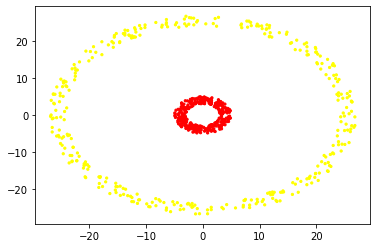

In [5]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")
plt.show()

## Algoritmo con K-means

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(2).fit(data)

In [9]:
clust = km.predict(data)

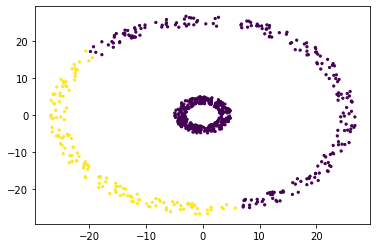

In [11]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5)
plt.show()

# K-Medoids

In [14]:
from pyclust import KMedoids

In [16]:
kmed = KMedoids(2).fit_predict(data)

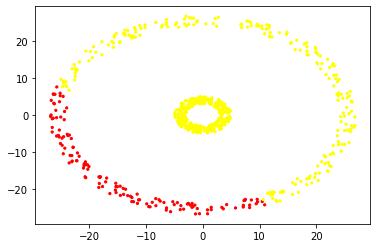

In [18]:
plt.scatter(data[:,0], data[:,1], c = kmed, s = 5, cmap = "autumn")
plt.show()

# Algoritmo del clustering espectral

In [19]:
from sklearn.cluster import SpectralClustering

In [20]:
clust = SpectralClustering(2).fit_predict(data)

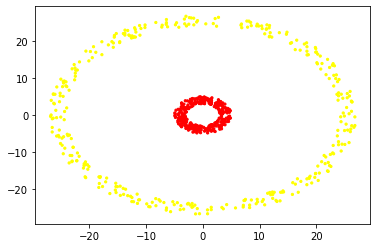

In [22]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")
plt.show()

* ¿Podemos estimar K?
    * No: Propagación de la afinidad
    * Sí: ¿Se puede usar distancia euclídea?
        * Sí: K-means
        * No: ¿Se puede buscar valores centrales?
            * Sí: K-Medoides
            * No: ¿Datos linealmente separables?
                * Sí: Clustering aglomerativo
                * No: Clustering espectral